[ 400. 1400.]


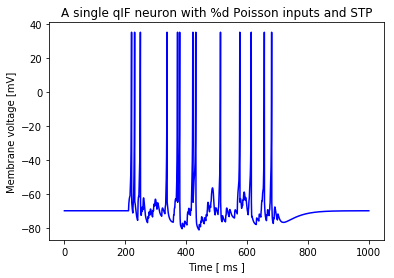

In [5]:
from pylab import *

# initialize parameters
tmax = 1000
dt = 0.5

# 1 . 1 ) Neuron / Network p a r s
a = 0.02 # RS , IB : 0.02 , FS :0.1
b = 0.2 # RS , IB , FS :0.2
c = -65 # RS , FS : −65 IB : −55
d = 8  # RS : 8 , IB :4 , FS :2
tau_s = 10 # decay of synapses [ ms ]
tau_d = 500 # synaptic depression [ ms ]
stp_u = 0.5 # STP parameter

#  Input pars
tr=array([200,700])/dt # stm time
rate_in = 2 # input rate
n_in = 100 # number of inputs
w_in = 0.07 # input weights
W_in = w_in*ones(n_in) # vector

print(tr)
#  reserve memory
T = int(ceil(tmax/dt))
v = zeros(T)
u = zeros(T)
v[0] = -70 # resting potential
u[0] = -14 # steady state
s_in = zeros(n_in) # synaptic variable
E_in = zeros(n_in) #rev potential
prate = dt*rate_in*1e-3 # abbrev
h = ones(n_in)
lastsp= -infty*ones(n_in)

#  for loop over time
for t in arange(T-1):
    # get input
    if t>tr[0] and t<tr[1]:
     # NEW: get input Poisson spikes
        p = uniform(size=n_in)<prate;
        #update synaptic depression
        tmp = exp(dt*(lastsp[p]-t )/tau_d)
        h[p] =  1-(1+(stp_u-1)*h[p])*tmp
        lastsp[p] = t
    else:
        p = 0 ; # no input

# NEW: calculate input current
    s_in = ( 1 - dt/tau_s)*s_in + p
    I = dot(W_in , s_in*E_in)
    I -= dot(W_in , s_in)*v[t]
    if v[t] <35:
     #  update ODE
        dv = (0.04*v[t]+5)*v[t]+140-u[t]
        v[t+1] = v[t]+(dv+I)*dt
        du = a*(b*v[t]-u[t])
        u[t+1] = u[t] + dt*du
    else:
     #  spike !
        v[t] = 35
        v[t+1] = c
        u[t+1] = u[t]+d
    
# 4 ) plot voltage trace
figure()
tvec = arange (0, tmax , dt)
plot ( tvec , v , 'b' , label='Voltage trace' )
xlabel ( 'Time [ ms ]')
ylabel ( 'Membrane voltage [mV]' )
title ( 'A single qIF neuron with %d Poisson inputs and STP')
show()